In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
car = pd.read_csv(r"C:\Users\ethan\Downloads\car_age_price.csv")

In [7]:
car.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [8]:
car.isnull().sum()

Year     0
Price    0
dtype: int64

<Axes: xlabel='Year', ylabel='Price'>

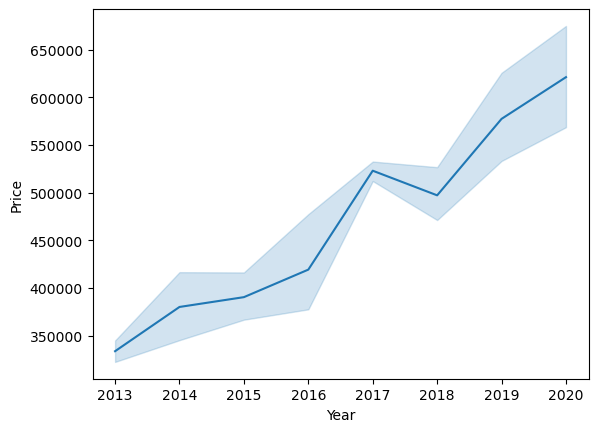

In [9]:
sns.lineplot(data=car, x="Year", y="Price")

## Creating independent and dependent variables.

In [10]:
inde = car.drop('Price', axis = 1)
dep = car['Price']

In [11]:
inde.head(3)

,Year
0,2018
1,2019
2,2019


In [12]:
dep.head(3)

0    465000
1    755000
2    700000
Name: Price, dtype: int64

## Creating Test and Train sets.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
inde_train, inde_test, dep_train, dep_test = train_test_split(inde, dep, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
lin_regg = LinearRegression()
model = lin_regg.fit(inde_train, dep_train)

In [16]:
prediction = model.predict(inde_test)

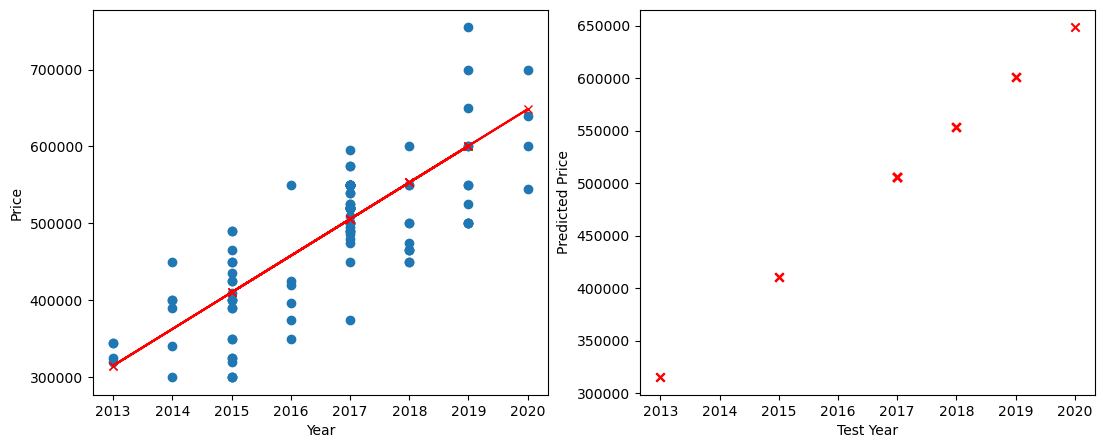

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.xlabel('Year')
plt.ylabel('Price')
plt.scatter(inde, dep)
plt.plot(inde_test, prediction,marker = 'x', color= 'red')

plt.subplot(1,3,2)
plt.xlabel('Test Year')
plt.ylabel('Predicted Price')
plt.scatter(inde_test, prediction, marker = 'x', color= 'red')
plt.show()

## Predicting the Price for the year 2022

In [55]:
#creating a dictionary with the same key name as that of the test feature's and converting it into a dataframe.
twenty22 = {'Year':[2022]}
predct_twenty22 = pd.DataFrame(twenty22)

In [19]:
predct_twenty22

,Year
0,2022


In [20]:
futr_price_2022 = model.predict(predct_twenty22)

In [21]:
print('The probable price for a second-hand i10 would be',futr_price_2022[0])

The probable price for a second-hand i10 would be 743601.6159450412


# Comparison between LR and LASSO

### Performing LASSO Regression.

In [22]:
from sklearn.linear_model import Lasso, LassoCV

In [25]:
lasso = LassoCV(alphas = np.arange(0.00001, 1, 0.05))
lasso.fit(inde, dep)

LassoCV(alphas=array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01]))

In [26]:
print('Perfect alpha value:', lasso.alpha_)

Perfect alpha value: 1e-05


In [39]:
#using LASSO regression
lasso = Lasso(alpha = 0.00001)

In [40]:
mdlLasso = lasso.fit(inde_train, dep_train)

In [38]:
predictLasso = mdlLasso.predict(inde_test)

In [43]:
from sklearn.metrics import mean_absolute_error
print("Training score:", mdlLasso.score(inde_train, dep_train))
print("Testing score:", mdlLasso.score(inde_test, dep_test))
print("MAE of Lasso Regression:", mean_absolute_error(dep_test, predictLasso), '\n')

Training score: 0.6389354253755817
Testing score: 0.3675931343268808
MAE of Lasso Regression: 53534.77957001264 



In [47]:
# for linear testing
print("Training score:", model.score(inde_train, dep_train))
print("Testing score:", model.score(inde_test, dep_test))
print("MAE of Linear Regression:", mean_absolute_error(dep_test, prediction), '\n')

Training score: 0.6389354253755697
Testing score: 0.36759313425902185
MAE of Linear Regression: 53534.77957001264 



In [49]:
#difference of testing score and training score of lasso regression
0.6389354253755817-0.3675931343268808

0.2713422910487009

In [50]:
#difference of testing score and training score of linear regression
0.6389354253755697-0.36759313425902185

0.27134229111654784

In [51]:
#finding the difference between difference testing and training values of lasso and lin regression
0.2713422910487009-0.27134229111654784

-6.78469502801704e-11

## ☝🏽 The negative sign indicates that difference of testing and training values is smaller is lasso regression. That means for this given dataset 'LASSO Regression performed better than the Linear Regression'.
###### From what I've learned, the closer or larger the testing score is to the training score the better the model will be.

In [53]:
# finding MSE of both reg
from sklearn.metrics import mean_squared_error
print('MSE = ', mean_squared_error(dep_test, prediction))

MSE =  4326906256.829671


In [54]:
#finding MSE for lasso
from sklearn.metrics import mean_squared_error
print('MSE = ', mean_squared_error(dep_test, predictLasso))

MSE =  4326906256.829671


#### Both regressions gave the same MSE value and is no where near to 0, possible reasons could be problems with the fitting, or could be the case with the dataset.